# Machine learing pipeline
## Step 1: Get data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score


import the dataset

In [2]:
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
#print(heart_disease.metadata) 
  
# variable information 
#print(heart_disease.variables)

y is wat we voorspellen

## Step 2: Explore the dataset

info

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [7]:
y.value_counts()

num
0      164
1       55
2       36
3       35
4       13
Name: count, dtype: int64

we kunnen hier zien dat 164 gezonden mensen zijn

Describe

In [8]:
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


check first 5 rows

In [9]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


remove missing values

X en y mergen

In [3]:
X['y'] = y
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,y
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:
X = X.dropna()
#X.dropna(inplace=True)

X info -> zien dat overal even veel lijnen zijn (ook bij y belangrijk voor straks)

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  y         297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB


x en y terug opsplitsen

In [13]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,y
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [6]:
y = X['y']
del X['y']
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


## Step 3: Variables
- selecting 
- train/test split

we gaan 'y' herwerken naar 0/1 (ziek of niet ziek) 

In [7]:
#y.replace([1,2,3,4],1)

y[y>1] = 1 # coole optie 
y.value_counts()

/tmp/ipykernel_37190/2628219642.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y>1] = 1 # coole optie
/tmp/ipykernel_37190/2628219642.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y>1] = 1 # coole optie


y
0    160
1    137
Name: count, dtype: int64

In [8]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

## Stap 4: Model trainen

In [9]:
Dtree = DecisionTreeClassifier()
Dtree.fit(X_train,y_train)

DT_preds = Dtree.predict(X_test)

In [10]:
randomForest = RandomForestClassifier(n_estimators=100,max_features='sqrt')
randomForest.fit(X_train,y_train)

RF_preds = randomForest.predict(X_test)

## Stap 5: Model evalueren
### Decision Tree Classifier

In [ ]:
ac = accuracy_score(y_test,DT_preds)
print(ac)

0.7666666666666667


### Random forest


In [20]:
ac = accuracy_score(y_test,RF_preds)
print(ac)

0.8333333333333334


cross validation

In [21]:
from sklearn.model_selection import cross_validate

RF = RandomForestClassifier(max_depth=2)
CV_results = cross_validate(RF,X_train,y_train,cv=5)
CV_results

{'fit_time': array([0.14098716, 0.09498644, 0.09924841, 0.11632991, 0.1063714 ]),
 'score_time': array([0.00421977, 0.00451565, 0.00569582, 0.00579786, 0.007689  ]),
 'test_score': array([0.9047619 , 0.76190476, 0.82926829, 0.85365854, 0.85365854])}

In [22]:
CV_results['test_score']

array([0.9047619 , 0.76190476, 0.82926829, 0.85365854, 0.85365854])

In [23]:
from sklearn import metrics
RF_preds = randomForest.predict_proba(X_test)
RF_preds = pd.DataFrame(RF_preds).iloc[:,1].values

fpr_d2,tpr_d2,thresholds_d2 = metrics.roc_curve(y_test,RF_preds)

Text(0, 0.5, 'TPR (recall, sensivitvity)')

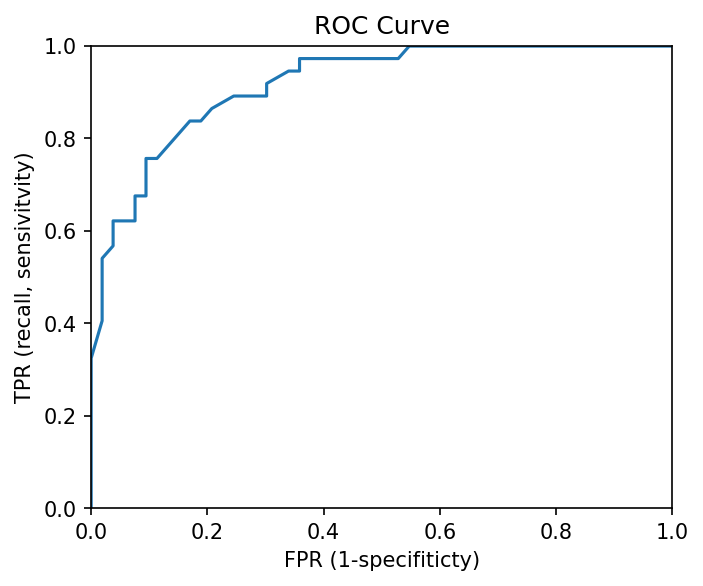

In [26]:
plt.figure(figsize = (5,4), dpi = 150)
plt.plot(fpr_d2,tpr_d2)
plt.margins(x=0,y=0)
plt.title('ROC Curve')
plt.xlabel('FPR (1-specifiticty)')
plt.ylabel('TPR (recall, sensivitvity)')